In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import matplotlib
import seaborn as sns 
import nltk
from nltk.corpus import stopwords
import string
from nltk import FreqDist
from nltk import flatten
import json
import os
import numpy as np
import datetime
from PIL import Image
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stop_f = stopwords.words('french')
stop_e = stopwords.words('english')
from random import sample
# Reading Data
#os.chdir('/Users/marcusthuillier/Desktop/personal_data/')



In [2]:
df = pd.read_csv("Books.csv")

In [3]:
stop_f.append("luy")
stop_f.append("qu'il")
stop_f.append("qu'ils")
stop_f.append("mesme")
stop_f.append("mesmes")
stop_f.append("soy")
stop_f.append("esté")
stop_f.append("estre")
stop_f.append("d'un")
stop_f.append("nostre")
stop_f.append("vostre")
stop_f.append("plus")
stop_f.append("d'une")

In [4]:
df.head()

,Chapitre,Titre,Texte,Unnamed: 3
0,I,Par divers moyens on arrive à pareille fin,LA plus commune façon d'amollir les coeurs de ...,NaN
1,II,De la Tristesse,"JE suis des plus exempts de cette passion, et ...",NaN
2,III,Nos affections s'emportent au delà de nous,CEUX qui accusent les hommes d'aller tousjours...,NaN
3,IV,Comme l'ame descharge ses passions sur des obj...,UN gentilhomme des nostres merveilleusement su...,NaN
4,V,"Si le chef d'une place assiegee, doit sortir p...","LUCIUS MARCIUS Legat des Romains, en la guerre...",NaN


In [5]:
def remove_stops(row):
    my_list = row['tokenized_sents']
    meaningful_words = [w for w in my_list if w not in stop_f]
    return (meaningful_words)

In [6]:
df.Texte = df.Texte.str.lower()
df.Texte = df.Texte.str.replace('  ', ' ')
df['tokenized_sents'] = df.apply(lambda row: nltk.word_tokenize(row['Texte']), axis=1)  
df['clean'] = df.apply(remove_stops, axis=1)
df["texte_clean"] = df["clean"].str.join(" ")

In [7]:
chap = list(df.Chapitre)
titre = list(df.Titre)

In [8]:
chap

['I',
 'II',
 'III',
 'IV',
 'V',
 'VI',
 'VII',
 'VIII',
 'IX',
 'X',
 'XI',
 'XII',
 'XIII',
 'XIV',
 'XV',
 'XVI',
 'XVII',
 'XVIII',
 'XIX',
 'XX',
 'XXI',
 'XXII',
 'XXIII',
 'XXIV',
 'XXV',
 'XXVI',
 'XXVII',
 'XXVIII',
 'XXIX',
 'XXX',
 'XXXI',
 'XXXII',
 'XXXIII',
 'XXXIV',
 'XXXV',
 'XXXVI',
 'XXXVII',
 'XXXVIII',
 'XXXIX',
 'XL',
 'XLI',
 'XLII',
 'XLIII',
 'XLIV',
 'XLV',
 'XLVI',
 'XLVII',
 'XLVIII',
 'XLIX',
 'L',
 'LI',
 'LII',
 'LIII',
 'LIV',
 'LV',
 'LVI',
 'LVII',
 'LVIII',
 'LIX',
 'LX',
 'LXI',
 'LXII',
 'LXIII',
 'LXIV',
 'LXV',
 'LXVI',
 'LXVII',
 'LXVIII',
 'LXIX',
 'LXX',
 'LXXI',
 'LXXII',
 'LXXIII',
 'LXXIV',
 'LXXV',
 'LXXVI',
 'LXXVII',
 'LXXVIII',
 'LXXIX',
 'LXXX',
 'LXXXI',
 'LXXXII',
 'LXXXIII',
 'LXXXIV',
 'LXXXV',
 'LXXXVI',
 'LXXXVII',
 'LXXXVIII',
 'LXXXIX',
 'XC',
 'XCI',
 'XCII',
 'XCIII',
 'XCIV',
 'XCV',
 'XCVI',
 'XCVII',
 'XCVIII',
 'XCIX',
 'C',
 'CI',
 'CII',
 'CIII',
 'CIV',
 'CV',
 'CVI',
 'CVII']

In [9]:
titre

['Par divers moyens on arrive à pareille fin',
 'De la Tristesse',
 "Nos affections s'emportent au delà de nous",
 "Comme l'ame descharge ses passions sur des objects faux, quand les vrais luy defaillent",
 "Si le chef d'une place assiegee, doit sortir pour parlementer",
 "L'heure des parlemens dangereuse",
 "Que l'intention juge nos actions",
 "De l'Oysiveté",
 'Des Menteurs',
 'Du parler prompt ou tardif',
 'Des Prognostications',
 'De la constance',
 "Ceremonie de l'entreveuë des Rois",
 "On est puny pour s'opiniastrer en une place sans raison",
 'De la punition de la couardise',
 'Un traict de quelques Ambassadeurs',
 'De la peur',
 "Qu'il ne faut juger de notre heur qu'apres la mort",
 "Que Philosopher, c'est apprendre a mourir",
 "De la force de l'imagination",
 "Le profit de l'un est dommage de l'autre",
 'De la coustume, et de ne changer aisément une loy receüe',
 'Divers evenemens de mesme Conseil',
 'Du pedantisme',
 "De l'institution des enfans ",
 "C'est folie de rapporter 

In [10]:
df.head(10)

,Chapitre,Titre,Texte,Unnamed: 3,tokenized_sents,clean,texte_clean
0,I,Par divers moyens on arrive à pareille fin,la plus commune façon d'amollir les coeurs de ...,NaN,"[la, plus, commune, façon, d'amollir, les, coe...","[commune, façon, d'amollir, coeurs, ceux, qu'o...",commune façon d'amollir coeurs ceux qu'on a of...
1,II,De la Tristesse,"je suis des plus exempts de cette passion, et ...",NaN,"[je, suis, des, plus, exempts, de, cette, pass...","[exempts, cette, passion, ,, l'ayme, ny, l'est...","exempts cette passion , l'ayme ny l'estime : q..."
2,III,Nos affections s'emportent au delà de nous,ceux qui accusent les hommes d'aller tousjours...,NaN,"[ceux, qui, accusent, les, hommes, d'aller, to...","[ceux, accusent, hommes, d'aller, tousjours, b...",ceux accusent hommes d'aller tousjours beant a...
3,IV,Comme l'ame descharge ses passions sur des obj...,un gentilhomme des nostres merveilleusement su...,NaN,"[un, gentilhomme, des, nostres, merveilleuseme...","[gentilhomme, nostres, merveilleusement, subje...",gentilhomme nostres merveilleusement subject g...
4,V,"Si le chef d'une place assiegee, doit sortir p...","lucius marcius legat des romains, en la guerre...",NaN,"[lucius, marcius, legat, des, romains, ,, en, ...","[lucius, marcius, legat, romains, ,, guerre, c...","lucius marcius legat romains , guerre contre p..."
5,VI,L'heure des parlemens dangereuse,toutes-fois je vis dernierement en mon voysina...,NaN,"[toutes-fois, je, vis, dernierement, en, mon, ...","[toutes-fois, vis, dernierement, voysinage, mu...",toutes-fois vis dernierement voysinage mussida...
6,VII,Que l'intention juge nos actions,"la mort, dict-on, nous acquitte de toutes nos ...",NaN,"[la, mort, ,, dict-on, ,, nous, acquitte, de, ...","[mort, ,, dict-on, ,, acquitte, toutes, obliga...","mort , dict-on , acquitte toutes obligations ...."
7,VIII,De l'Oysiveté,"comme nous voyons des terres oysives, si elles...",NaN,"[comme, nous, voyons, des, terres, oysives, ,,...","[comme, voyons, terres, oysives, ,, si, elles,...","comme voyons terres oysives , si elles grasses..."
8,IX,Des Menteurs,il n'est homme à qui il siese si mal de se mes...,NaN,"[il, n'est, homme, à, qui, il, siese, si, mal,...","[n'est, homme, siese, si, mal, mesler, parler,...",n'est homme siese si mal mesler parler memoire...
9,X,Du parler prompt ou tardif,onc ne furent à tous toutes graces données. au...,NaN,"[onc, ne, furent, à, tous, toutes, graces, don...","[onc, tous, toutes, graces, données, ., aussi,...",onc tous toutes graces données . aussi voyons ...


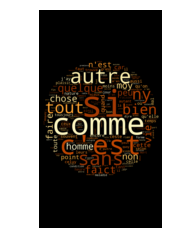

In [11]:
col = ['Purples',  'Greens', 'Oranges', 'Reds','YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'YlGnBu', 'YlGn']
mask = np.array(Image.open("/Users/marcusthuillier/Desktop/Montaigne/Presentation1/Slide1.png"))
for i in range(len(df)):
    text = df.texte_clean.iloc[i]
    colormap = sample(col,1)[0]
    wordcloud = WordCloud(width=1600, height=3200, background_color="black", colormap=colormap, mask=mask).generate(text)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    wordcloud.to_file("Files/" + str(i) + '.png')